In [ ]:
import json
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import math as mth
from json import JSONDecodeError
from matplotlib.transforms import Affine2D

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/mvtec_screws/
!pwd

/content/drive/My Drive/mvtec_screws
/content/drive/My Drive/mvtec_screws


In [ ]:
# JSON values are returned as [image_id,[list of box params],image_id,[list of box params] etc
def return_json_values(json_obj):
    return_list = []
    for annot in json_obj["annotations"]:
        if annot["image_id"] == 1:
            bbox = annot["bbox"]
            category_id = annot["category_id"]
            return_list.append(category_id)
            return_list.append(bbox)
    return return_list


def extract_the_json(file_obj):
    try:
        json_obj = json.load(file_obj)
        return json_obj
    except JSONDecodeError:
        print("Could not load the json file: ", file_obj.name)


def make_the_file(file_name):
    try:
        file = open(file_name,'r')
        return file
    except OSError:
        print("Could not read file : ", file_name)
        sys.exit()


def get_the_pictures(number_of_photos):
    photo_obj = []
    for i in range(1,number_of_photos):
        photo_obj.append(make_the_file("./images/screws_00" + str(i) + ".png"))
    return photo_obj


def put_the_pictures_in_matplot(photo_list, annotations):
    for photo in photo_list:
        img = mpimg.imread(photo.name,format="png")
        imgplot = plt.imshow(img)
        put_the_shapes_on_pictures(img,annotations)



def put_the_shapes_on_pictures(img_plt, annotations):
    for i in range(0,32):
        # selects every even index in annotations subcat is what part it is
        if i % 2 == 0 :
            fig, axis = plt.subplots()
            subcategory = annotations[i]
            i += 1
            dimensions = annotations[i]
            # use half the width or height as needed to translate the patches outline 1/2(width) -> x distance we'll need to move
            rect = patches.Rectangle((dimensions[1] - dimensions[3]/2,dimensions[0] - dimensions[2]/2),dimensions[3],dimensions[2],edgecolor='b',facecolor='none')
            # use the matplot lib to rotate the object
            transform = Affine2D().rotate_around(dimensions[1], dimensions[0],-dimensions[4] + (mth.pi/2))
            rect.set_transform(transform + plt.gca().transData)
            axis.add_patch(rect)
            axis.imshow(img_plt)
            plt.show()

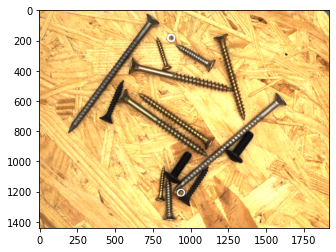

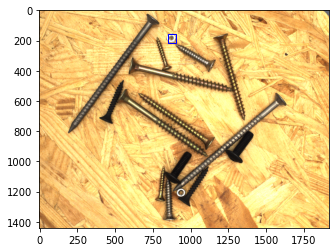

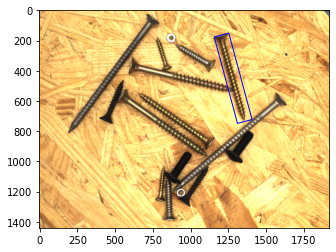

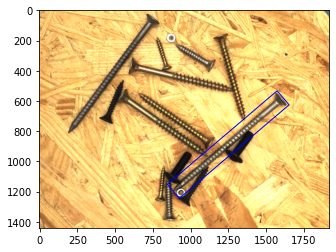

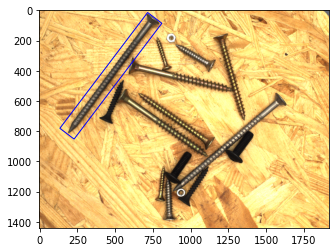

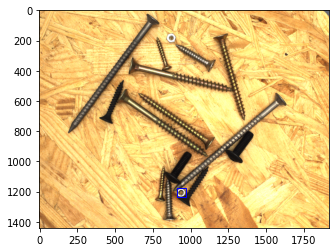

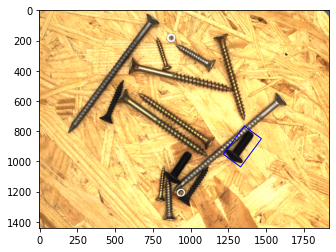

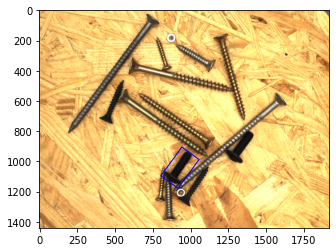

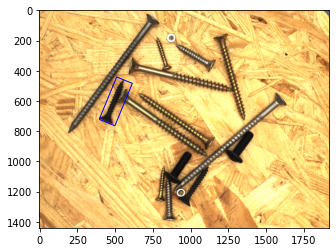

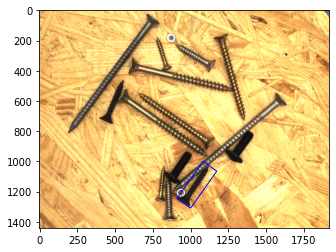

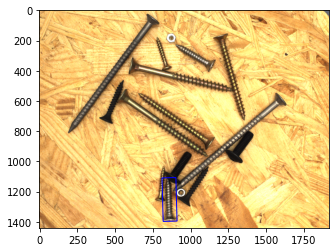

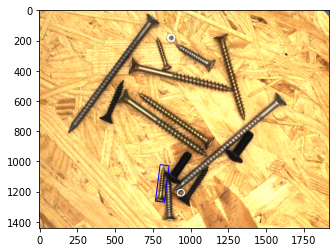

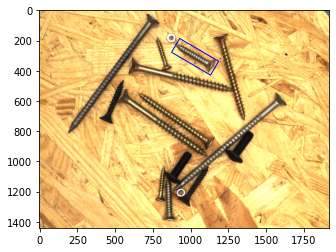

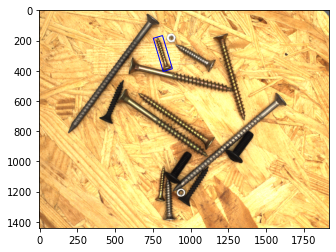

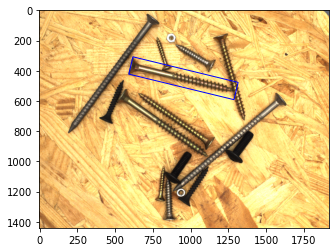

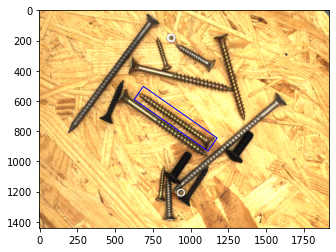

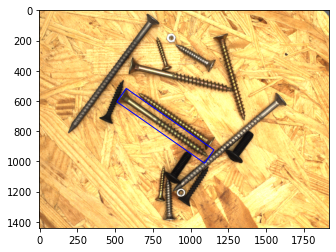

In [ ]:
file = make_the_file("./mvtec_screws.json")
json_file = extract_the_json(file)
json_values = return_json_values(json_file)
pictures = get_the_pictures(2)
put_the_pictures_in_matplot(pictures,json_values)